# Gaussian Copulas Simulator

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.rcParams['figure.figsize'] = (8, 8)

In [2]:
nsamples = 1000
s = 2.0
r = 0.75

In [3]:
U1 = np.random.rand(nsamples)
U2 = np.random.rand(nsamples)

R = np.array([[s**2, r*s**2], [r*s**2, s**2]])
G = np.random.multivariate_normal(np.zeros(2), R, nsamples)
G1 = G[:, 0]
G2 = G[:, 1]

C1 = norm.cdf(G1, loc=0, scale=s)
C2 = norm.cdf(G2, loc=0, scale=s)

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


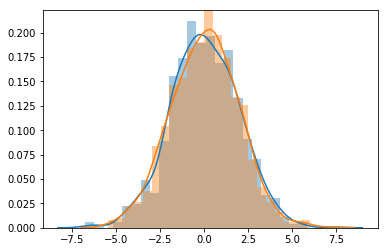

In [4]:
_ = sb.distplot(G1)
_ = sb.distplot(G2)

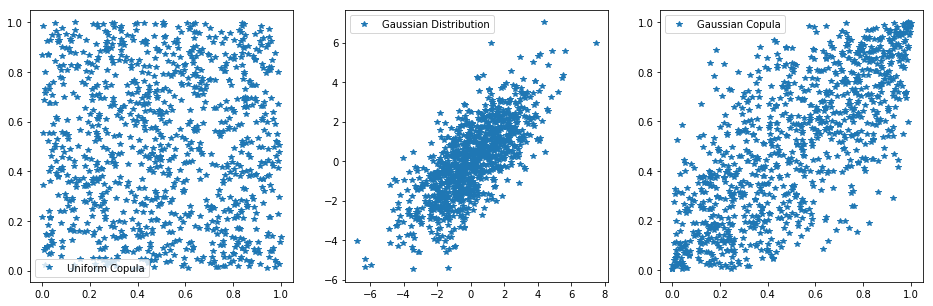

In [5]:
plt.figure(1, figsize=(16,5))

plt.subplot(131)
plt.plot(U1, U2, '*', label='Uniform Copula')
plt.legend()

plt.subplot(132)
plt.plot(G1, G2, '*', label='Gaussian Distribution')
plt.legend()

plt.subplot(133)
plt.plot(C1, C2, '*', label='Gaussian Copula')
plt.legend()

In [6]:
from tpy.copulas import GaussianCopula

gc = GaussianCopula(loc=0, scale=s, corr=r, nsamples=nsamples)

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


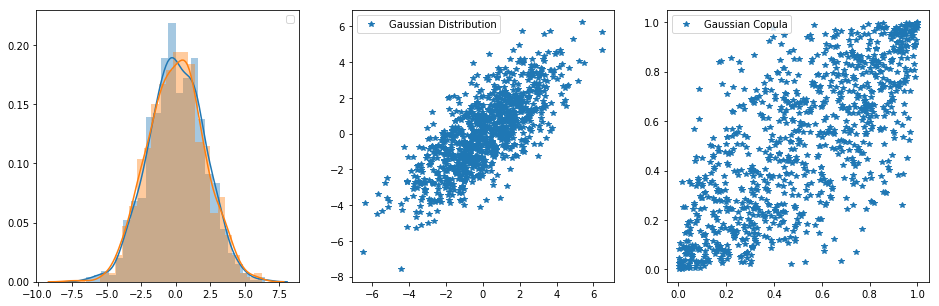

In [7]:
plt.figure(1, figsize=(16,5))

m1, m2 = gc.marginals()
J = gc.joint()
C = gc.copula()

plt.subplot(131)
_ = sb.distplot(m1)
_ = sb.distplot(m2)
plt.legend()

plt.subplot(132)
plt.plot(J[:,0], J[:,1], '*', label='Gaussian Distribution')
plt.legend()

plt.subplot(133)
plt.plot(C[:,0], C[:,1], '*', label='Gaussian Copula')
plt.legend()